Notre objectif est d'aider les gynécologues à déterminer les facteurs à risque d’accouchement prématuré et pouvoir entre autre de savoir si la future maman en question aura réellement besoin d’un accouchement prématuré.



In [161]:
#importer les librairies pandas et numpy
import numpy as np
import pandas as pd

Le fichier "Accouchement.xls" porte sur les facteurs prénataux (médicaux et de personne) liés à un accouchement prématuré chez les femmes déjà en travail prématuré.


#### Télécharger et afficher le data frame 

In [207]:
data= pd.read_excel('Accouchement.xls')
print(data)

     GEST  DILATE  EFFACE  CONSIS  CONTR  MEMBRAN  AGE  STRAT  GRAVID  PARIT  \
0      31       3     100       3      1        2   26      3       1      0   
1      28       8       0       3      1        2   25      3       1      0   
2      31       3     100       3      2        2   28      3       2      0   
3      27       2      75       3      2        2   27      2       2      1   
4      28       6      75       3      2        2   17      3       1      0   
..    ...     ...     ...     ...    ...      ...  ...    ...     ...    ...   
385    34       3      75       3      1        1   28      4       3      2   
386    31       0       0       1      1        1   35      3       2      1   
387    31       2     100       3      1        2   26      3       1      0   
388    29       0       0       1      1        3   19      3       1      0   
389    31       1     100       3      1        2   29      3       2      1   

     DIAB  TRANSF  GEMEL PREMATURE  
0 

GEST: l'âge gestationnel en semaines à l'entrée dans l'étude DILATE: la dilatation du col en cm EFFACE: l’effacement du col (en %) CONSIS: la consistance du col (1= mou, 2= moyen, 3=ferme) CONTR: la présence (=1) ou non (=2) de contraction MEMBRAN: les membranes rupturées (=1) ou non (=2) ou incertain (=3) AGE: l’âge de la patiente STRAT: période de la grossesse GRAVID: la gestité (nombre de grossesses antérieures y compris celle en cours) PARIT: la parité (nombre de grossesses à terme antérieures) DIAB: la présence (=1) ou non (=2) d'un problème de diabète, ou valeur manquante (=9) BEBAGE: âge gestationnel (en jours) du bébé à la naissance TRANSF: le transfert (1) ou non (2) vers un hôpital en soins spécialisés GEMEL: grossesse simple (=1) ou multiple (=2) 

#### Return the first `5` rows.

In [206]:
data.head(5)

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE
0,31,3,100,3,1,2,26,3,1,0,2,2,1,positif
1,28,8,0,3,1,2,25,3,1,0,2,1,2,positif
2,31,3,100,3,2,2,28,3,2,0,2,1,1,positif
3,27,2,75,3,2,2,27,2,2,1,2,1,2,positif
4,28,6,75,3,2,2,17,3,1,0,2,1,1,positif


#### Return the last `5` rows.

In [18]:
data.tail(5)

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE
385,34,3,75,3,1,1,28,4,3,2,2,1,1,positif
386,31,0,0,1,1,1,35,3,2,1,2,1,1,positif
387,31,2,100,3,1,2,26,3,1,0,2,1,2,positif
388,29,0,0,1,1,3,19,3,1,0,2,1,1,positif
389,31,1,100,3,1,2,29,3,2,1,2,2,1,positif


## 13 variables ont été retenues pour 390 femmes enrôlées dans l'étude.

#### Affiche la taille du Dataframe

In [21]:
data.shape

(390, 14)

#### Afficher les valeurs uniques qui se produisent dans la colonne "Premature"


In [119]:
a=data['PREMATURE'].unique()
print(a)

['positif' 'negatif']


#### Afficher le nombre des observations pour chaque valeur unique dans la colonne "Premature"


In [53]:
#data.info()
data['PREMATURE'].count()
num_obs=pd.value_counts(data.PREMATURE)
print(num_obs)

positif    266
negatif    124
Name: PREMATURE, dtype: int64


#### Afficher graphiquement les résulats de la question précédente en utilisant les librairies  matplotlib et seaborn

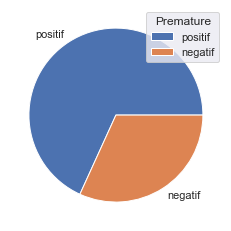

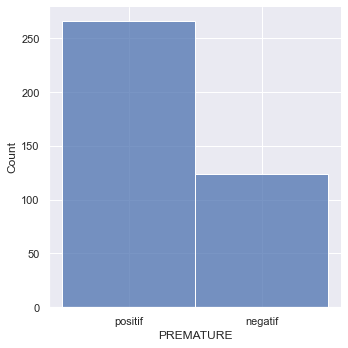

In [74]:
import matplotlib.pyplot as plt
import seaborn as sb

#using matplotlib
y=num_obs.to_list()
x=a
plt.pie(y, labels=x)
plt.legend(title='Premature')

#using seaborn
sb.displot(data.PREMATURE)


#Diviser les données en données d'apprentissage et données de test 

In [135]:
#Séparer les features et le label
features=data.iloc[: , :-1]
features
label=data.iloc[:,-1]
label

0      positif
1      positif
2      positif
3      positif
4      positif
        ...   
385    positif
386    positif
387    positif
388    positif
389    positif
Name: PREMATURE, Length: 390, dtype: object

In [143]:
#Encoder la colonne contenant la variable Cible
from sklearn import preprocessing
label_enc=preprocessing.LabelEncoder().fit_transform(label)
label_enc

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,

In [248]:
# Diviser les données en données d'apprentissage et données de test
#random_state garantit que les divisions que vous générez sont 
#reproductibles. 
#Scikit-learn utilise des permutations aléatoires pour générer 
#les divisions. L'état aléatoire que vous fournissez est utilisé 
#comme graine du générateur de nombres aléatoires. 
#Cela garantit que les nombres aléatoires sont générés dans le même ordre.

from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(features, label_enc, random_state=0)

#Centrage Réduction des données avec la méthode  MinMaxScaler(): appliquer la fonction (xi-xmin)/(xmax-xmin)

In [249]:
scaler=preprocessing.MinMaxScaler()
xtrain_scaled=scaler.fit_transform(xTrain)
xtest_scaled=scaler.fit_transform(xTest)

#Appliquer k-Nearest Neighbors 

In [250]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain_scaled,yTrain)


KNeighborsClassifier()

# Choisir le nombre de voisins optimal

Text(0, 0.5, 'Error Rate')

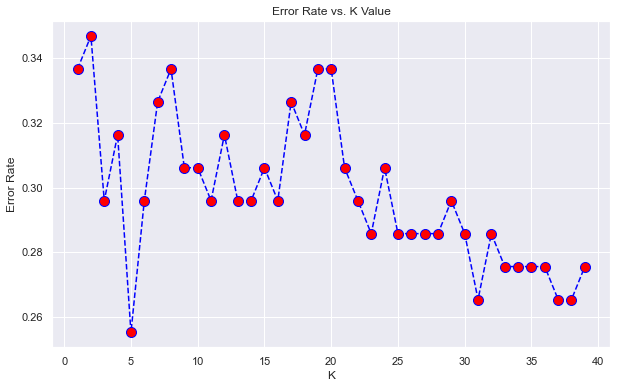

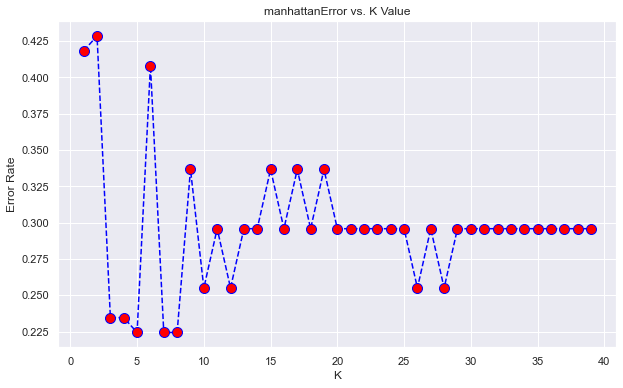

In [268]:
error = []
manhattanError = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 40 et la distance Manhattan
from sklearn.metrics import mean_squared_error
for i in range(1,40):
 knn_e = KNeighborsClassifier(n_neighbors=i)
 knn_e.fit(xtrain_scaled,yTrain)
 pred_i = knn_e.predict(xtest)
 error.append(mean_squared_error(yTest,pred_i ))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



for i in range(1, 40):
    knnLoop = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    knnLoop.fit(xtrain_scaled,yTrain)
    prediction = knnLoop.predict(xTest)
    manhattanError.append(mean_squared_error(yTest, prediction))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),manhattanError,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('manhattanError vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')    
    
    
    



Choisir le nombre de voisins le plus optimal

In [275]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(xtrain_scaled,yTrain)
prediction = knn.predict(xTest)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

Evaluer les performances du modèle sur les données de Test avec les indicateurs de performance: Matrice de confusion , Bonne Classification(Accuracy) et Score F1

In [280]:
from sklearn.metrics import accuracy_score
print("accuracy : " , accuracy_score(yTest,prediction))

accuracy :  0.7755102040816326


In [277]:
from sklearn.metrics import  confusion_matrix
print("Matrice de confusion :\n " , confusion_matrix(yTest,prediction))

Matrice de confusion :
  [[16 17]
 [ 5 60]]


In [279]:
from sklearn.metrics import  f1_score
print("F1 Score : " , f1_score(yTest,prediction))

F1 Score :  0.8450704225352113


#les performances du modèle sur les données de Test en utilisant la courbe ROC


[2 1 0]


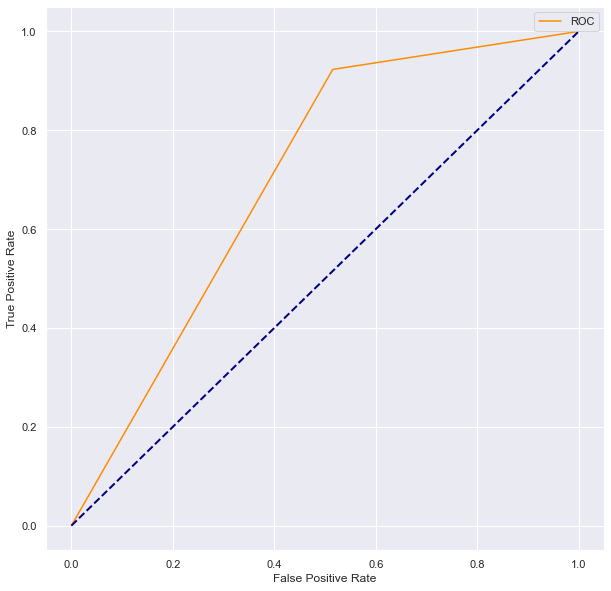

In [278]:
#Affichage avec la bibliothèque graphique intégrée à Notebook
#%matplotlib inline
%matplotlib inline
from sklearn.metrics import roc_curve

fpr, tpr , threshhold = roc_curve(yTest,prediction)
print(threshhold)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color="darkorange", label="ROC")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
